# Personal Finance Demo

This page is for demonstration purposes only.

Objectives of this page are to demonstrate the importance of:
1. prioritizing debt payments by interest rate
2. diversifying your portfolio

In [65]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

Dependencies:
1. liability: self
2. debt_remaining: self
3. front_end: liability()
4. debt_graphs: front_end(), debt_remaining(), liability()

In [37]:
#User inputs principal, interest rate, and monthly payment
#Outputs time to payoff and total interest paid over time
#Plots a graph of the balance over time

def liability(): #this function writes one row of debt
    debt_name = input('How do you refer to this debt (loan, credit card)?: ')
    principal = float(input('What is your balance: '))
    interest_rate = float(input('What is the interest rate %? '))/100/12
    payment = float(input('How much do you want to pay monthly: '))
    
    time = -1*np.log10(1-interest_rate*principal/payment)/np.log10(1+interest_rate)
    
    print('The number of months to pay off your', debt_name, ' will be ', time, ' months.')
    
    return debt_name, principal, interest_rate, payment, time

def add_debt(df): 
    df=df.append(front_end())
    return df

#this function is formula for remaining debt
def debt_remaining(principal, interest_rate, payment, number_of_payments):
    remaining_debt=principal*(1+interest_rate**number_of_payments)-(payment/interest_rate)*\
    ((1+interest_rate)**number_of_payments-1)
    return remaining_debt

#this function prompts the user to enter each row of debt and converts everything into a dataframe
def front_end():
    x='y' #initialize the continue variable to yes
    c=0 #counter
    all_your_debt = [['debt_name', 'principal', 'interest_rate', 'payment', 'time']]

    while x=='y' or x=='yes':
        all_your_debt.append(liability()) 
        x=input('Would you like to add another debt? ')
        c+=1
        
    df = pd.DataFrame(all_your_debt, columns=all_your_debt[0])
    df=df.drop([0])
    df.set_index('debt_name')
    return df
    
def debt_graphs(): #this function graphs all of your debts (not yet tho)
    df=front_end()
    x=range(int(df.iloc[0]['time']), 1, -1) #x-axis will be total number of months down to 1
#     x2=range(int(df.iloc[1]['time']), 1, -1) #x-axis will be total number of months down to 1

    y=[] #initialize list for total price
    z=0 #principal

    principal = df.iloc[0]['principal']
    interest_rate = df.iloc[0]['interest_rate']
    payment = df.iloc[0]['payment']
    title = df.iloc[0]['debt_name']
    
#     principal = df.iloc[1]['principal']
#     interest_rate = df.iloc[1]['interest_rate']
#     payment = df.iloc[1]['payment']
#     title = df.iloc[1]['debt_name']
    
#     debt1 = [principal, interest_rate, payment, n]
    
    for n in x:
        z=debt_remaining(principal, interest_rate, payment, n)
        y.append(z)

    plt.xlabel('Number of payment periods (m) ')
    plt.ylabel('Outstanding debt ($) ')
    plt.title(title + ' Repayment trend ')

    plt.plot(x,y)
    plt.show()

How do you refer to this debt (loan, credit card)?: AAAAA
What is your balance: 7000
What is the interest rate %? 5
How much do you want to pay monthly: 150
The number of months to pay off your AAAAA  will be  52.00158266547926  months.
Would you like to add another debt? 6100


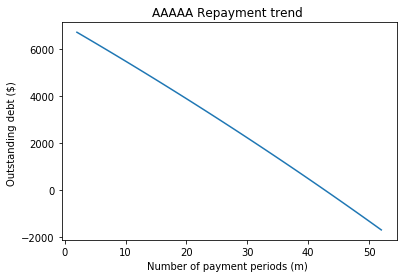

In [38]:
debt_graphs()

### Below is a mechanism for graphing debt repayment

In [ ]:
df=front_end()
x1=range(int(df.iloc[0]['time']), 1, -1) #x-axis will be total number of months down to 1
# x2=range(int(df.iloc[1]['time']), 1, -1) #x-axis will be total number of months down to 1

y=[] #initialize list for total price
z=0 #principal

principal = df.iloc[0]['principal']
interest_rate = df.iloc[0]['interest_rate']
payment = df.iloc[0]['payment']
title = df.iloc[0]['debt_name']

# principal = df.iloc[1]['principal']
# interest_rate = df.iloc[1]['interest_rate']
# payment = df.iloc[1]['payment']
# title = df.iloc[1]['debt_name']

# debt1 = [principal, interest_rate, payment, n]

for n in x1:
    z=debt_remaining(principal, interest_rate, payment, n)
    y.append(z)

plt.xlabel('Number of payment periods (m) ')
plt.ylabel('Outstanding debt ($) ')
plt.title(title + ' Repayment trend ')

plt.plot(x,y)
plt.show()

In [39]:
df=front_end()

How do you refer to this debt (loan, credit card)?: AAAAAA
What is your balance: 7000
What is the interest rate %? 5
How much do you want to pay monthly: 150
The number of months to pay off your AAAAAA  will be  52.00158266547926  months.
Would you like to add another debt? y
How do you refer to this debt (loan, credit card)?: BBBBBBB
What is your balance: 8000
What is the interest rate %? 4
How much do you want to pay monthly: 144
The number of months to pay off your BBBBBBB  will be  61.540664207401264  months.
Would you like to add another debt? m


In [43]:
df

,debt_name,principal,interest_rate,payment,time
1,AAAAAA,7000,0.00416667,150,52.0016
2,BBBBBBB,8000,0.00333333,144,61.5407
1,CCCCCC,9000,0.00333333,200,48.8369


In [41]:
df = add_debt(df)

How do you refer to this debt (loan, credit card)?: CCCCCC
What is your balance: 9000
What is the interest rate %? 4
How much do you want to pay monthly: 200
The number of months to pay off your CCCCCC  will be  48.83689324501495  months.
Would you like to add another debt? N


In [42]:
df

,debt_name,principal,interest_rate,payment,time
1,AAAAAA,7000,0.00416667,150,52.0016
2,BBBBBBB,8000,0.00333333,144,61.5407
1,CCCCCC,9000,0.00333333,200,48.8369


In [50]:
df['principal'].sum()

61.540664207401264

C:\Users\mkorn\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


(0, 9254.604747765772)

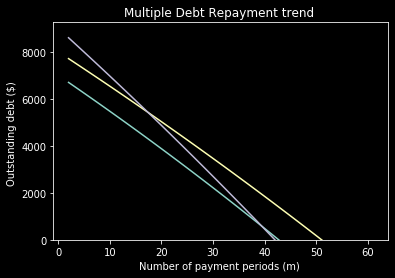

In [91]:
# df=front_end()
x=range(int(df.time.max()), 1, -1) #x-axis will be total number of months down to 1

y=[] #initialize list for total price
z=0 #principal

for n in x:
    z=debt_remaining(df['principal'], df['interest_rate'], df['payment'], n)
    y.append(z)

plt.xlabel('Number of payment periods (m) ')
plt.ylabel('Outstanding debt ($) ')
plt.title('Multiple Debt Repayment trend ')

#new attempts to resize
    # fig = plt.figure(figsize=(18,8))
    # mpl.style.use(['dark_background']) # optional color

ax = plt.subplot(1, 1, 1)
# kind='line', figsize=(18,8)
ax.plot(x,y)
ax.set_ylim(bottom=0)

In [60]:
print(y)

[1   -3393.42
2   -1722.88
1   -4503.99
dtype: object, 1   -3200.91
2   -1547.05
1    -4259.8
dtype: object, 1   -3009.21
2   -1371.81
1   -4016.41
dtype: object, 1    -2818.3
2   -1197.16
1   -3773.83
dtype: object, 1   -2628.18
2   -1023.08
1   -3532.05
dtype: object, 1   -2438.85
2   -849.581
1   -3291.08
dtype: object, 1   -2250.31
2   -676.659
1   -3050.91
dtype: object, 1   -2062.55
2   -504.311
1   -2811.54
dtype: object, 1   -1875.57
2   -332.536
1   -2572.97
dtype: object, 1   -1689.36
2   -161.331
1   -2335.18
dtype: object, 1   -1503.93
2    9.30435
1   -2098.19
dtype: object, 1   -1319.26
2    179.373
1   -1861.98
dtype: object, 1   -1135.37
2    348.877
1   -1626.56
dtype: object, 1   -952.233
2    517.817
1   -1391.92
dtype: object, 1   -769.858
2    686.197
1   -1158.06
dtype: object, 1   -588.241
2    854.017
1   -924.977
dtype: object, 1   -407.377
2    1021.28
1   -692.668
dtype: object, 1   -227.263
2    1187.99
1   -461.131
dtype: object, 1   -47.8968
2    1354.14
1